#Support Vector Machine (SVM)

In [ ]:
import numpy as np
import math
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# use seaborn plotting defaults
import seaborn as sns; sns.set()
# linearly map the colors in the colormap from data values vmin to vmax.
from matplotlib.colors import Normalize
# to build interactive GUIs for your notebooks
import ipywidgets as widgets
# Once figures are created and then subsequently shown,
# they will placed in an interactive widget inside the notebook allowing panning
# and zooming in the same way as any other matplotlib backend.
%matplotlib nbagg

In [ ]:
#plot setup
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()

    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 100)
    Y, X = np.meshgrid(y, x)

    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])

    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

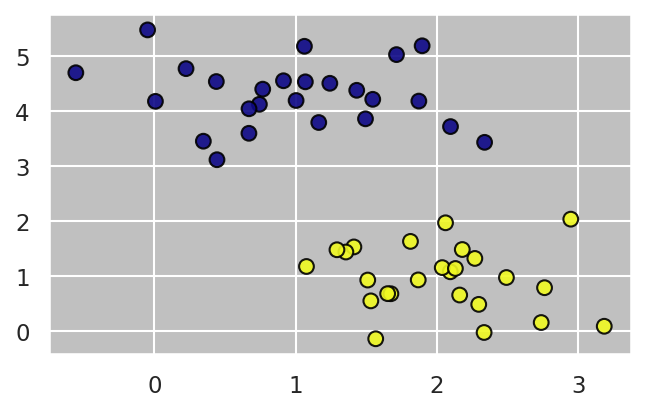

In [ ]:
plt.figure(figsize=(5, 3), dpi=150)
ax = plt.axes()
ax.set_facecolor('silver')

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.plasma, alpha=0.9)
plt.show()

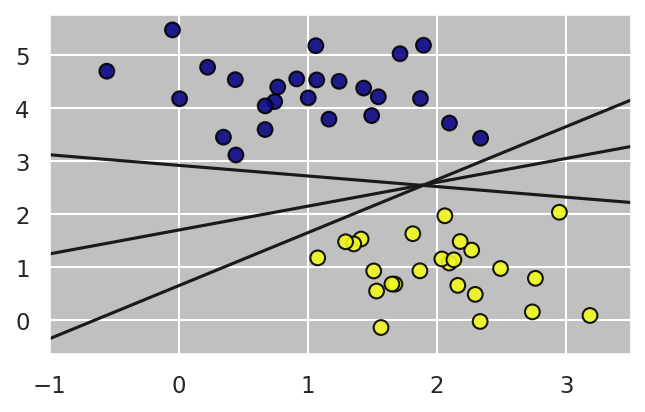

In [ ]:
# Decision Boundary
plt.figure(figsize=(5, 3), dpi=150)
ax = plt.axes()
ax.set_facecolor('silver')
# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='plasma', alpha=0.9)

# draw three different separators
x_values = np.linspace(-1, 3.5)
for w, b in [(1, 0.65), (0.45, 1.7), (-0.2, 2.92)]:
    plt.plot(x_values, w * x_values + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

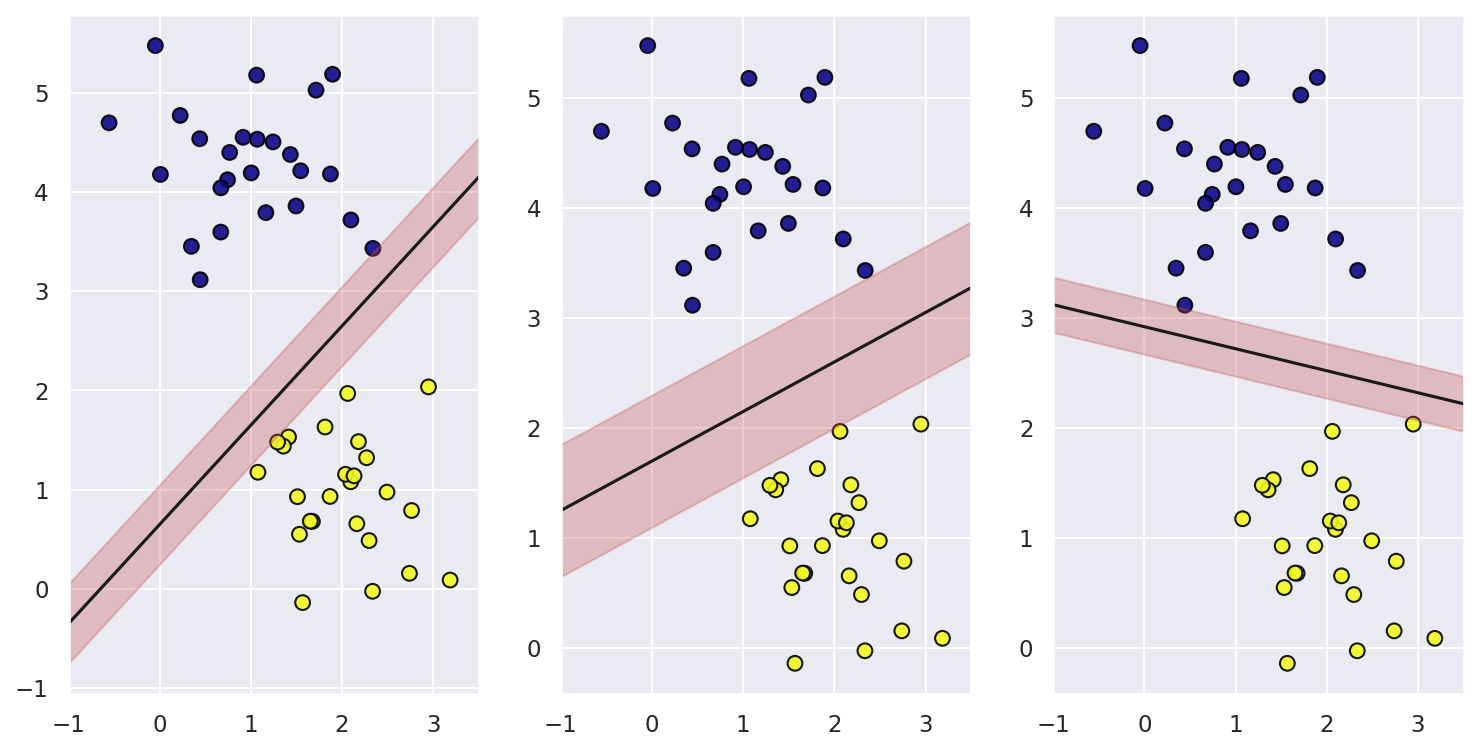

In [ ]:
#Support Vector Machines: Maximizing the Margin
# draw separators and margins
x_values = np.linspace(-1, 3.5)

plt.figure(figsize=(12, 6), dpi=150)

for i, (w, b, m) in enumerate([(1, 0.65, 0.4), (0.45, 1.7, 0.6), (-0.2, 2.92, 0.25)]):
    plt.subplot(1, 3, i + 1)

    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='plasma', alpha=0.9)
    y_values = w * x_values + b

    # draw separator and margin
    plt.plot(x_values, y_values, '-k')
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='r', alpha=0.3)
    plt.xlim(-1, 3.5)

plt.show()

In [ ]:
# Fitting a Support Vector Machine
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(kernel='linear')

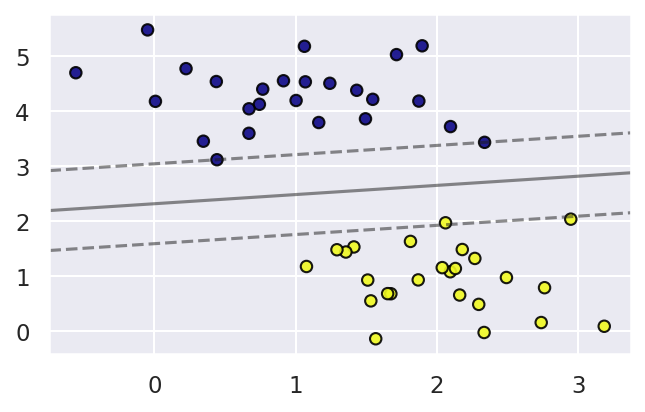

In [ ]:
# Plot decision boundary for SVM

plt.figure(figsize=(5, 3), dpi=150)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black', cmap='plasma', alpha=0.9)
plot_svc_decision_function(clf)
plt.show()

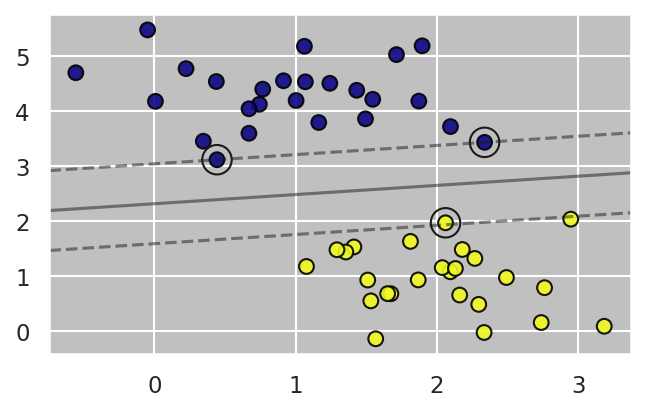

In [ ]:
# Support Vectors
plt.figure(figsize=(5, 3), dpi=150)
ax = plt.axes()
ax.set_facecolor('silver')
# plot data and margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='plasma', alpha=0.9)
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

In [ ]:
def plot_svm(N=10):
    ax.clear()

    # create data and classify
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear', gamma='scale', C=np.inf)
    clf.fit(X, y)

    # show classification result
    plt.figure(figsize=(5, 3), dpi=150)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='plasma', alpha=0.7)
    plt.xlim(-1.5, 4.5)
    plt.ylim(-1.5, 6.5)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
    plt.show()

InSl = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N_data:')
widgets.interact(plot_svm, N=InSl, kernel='linear');

interactive(children=(IntSlider(value=10, description='N_data:', max=200, min=10, step=10), Output()), _dom_cl…

In [ ]:
# Soft Margin
def plot_svm(N=10):
    ax.clear()

    # create data and classify
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear', gamma='scale', C=0.1)
    clf.fit(X, y)

    # display classification results
    plt.figure(figsize=(5, 3), dpi=150)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='plasma', alpha=0.7)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
    plt.show()

InSl = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N_data:')
widgets.interact(plot_svm, N=InSl, kernel='linear');

interactive(children=(IntSlider(value=10, description='N_data:', max=200, min=10, step=10), Output()), _dom_cl…

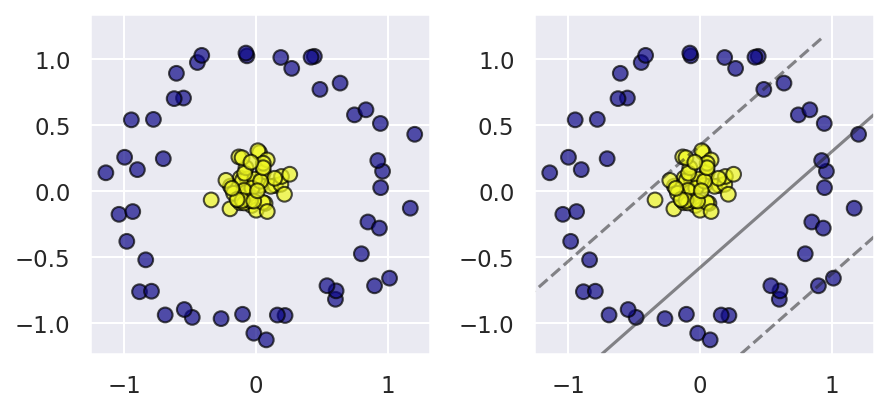

In [ ]:
# Non-linear Classiffication: Kernels
# create dataset
X, y = make_circles(100, factor=.1, noise=.1, random_state=3)

# vreate and train classifier
clf = SVC(kernel='linear').fit(X, y)

# show classification results
plt.figure(figsize=(7, 3), dpi=150)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='plasma', alpha=0.7)
plt.axis('square')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='plasma', alpha=0.7)
plot_svc_decision_function(clf)
plt.axis('square');

#### kernel: radial basis function

$$r(x, 0) = e^{-(x_0^2 + x_1^2)}$$

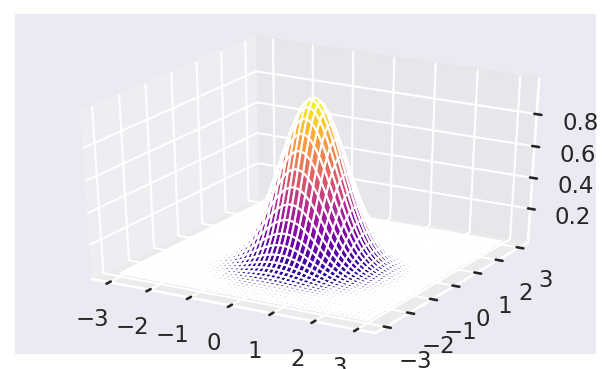

In [ ]:
fig = plt.figure(figsize=(5,3), dpi=150)

ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
R = np.exp(-(X1 ** 2 + X2 ** 2))
ax.plot_surface(X1, X2, R, cmap=plt.cm.plasma)
plt.show()

findfont: Font family ['Franklin Gothic Medium'] not found. Falling back to DejaVu Sans.


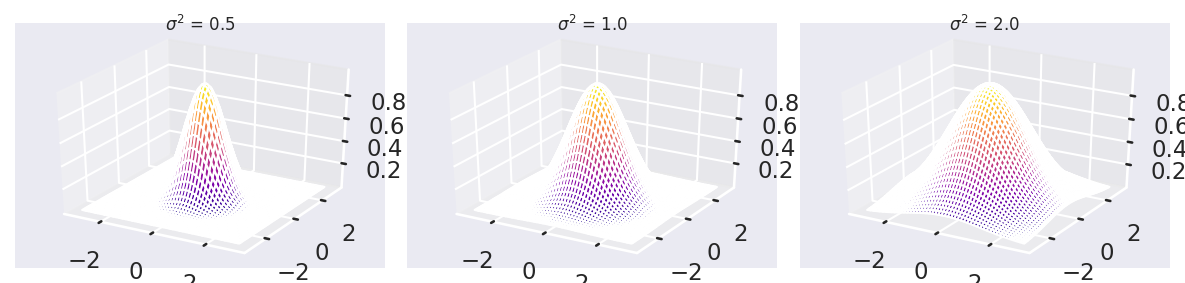

In [ ]:
fig = plt.figure(figsize=(8,2), dpi=150)
# plt.rcParams['font.sans-serif']
# plt.rcParams["figure.figsize"] = [0.50, 0.50]
# plt.rcParams["figure.autolayout"] = True

sigma_list = [0.5, 1.0, 2.0]
for i in range(3):
  ax = fig.add_subplot(1, 3, i+1, projection='3d')
  x1 = np.linspace(-3, 3, 100)
  x2 = np.linspace(-3, 3, 100)
  X1, X2 = np.meshgrid(x1, x2)

  sigma2 = sigma_list[i]
  R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
  surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.plasma)
  plt.title('$\sigma^2$ = {:.1f}'.format(sigma2), fontname='Franklin Gothic Medium', fontsize=8)
plt.tight_layout()
plt.show()

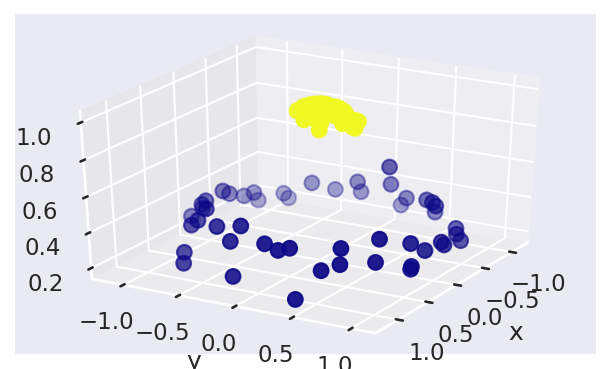

In [ ]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
fig = plt.figure(figsize=(5,3), dpi=150)
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='plasma')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

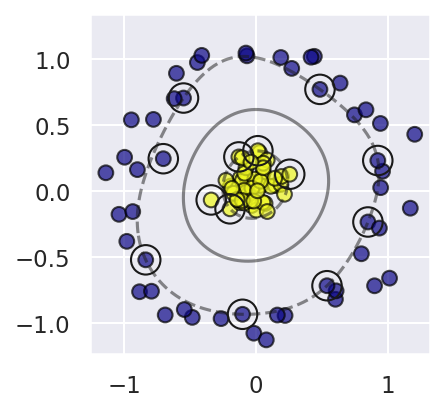

In [ ]:
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X, y)

fig = plt.figure(figsize=(5,3), dpi=150)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='plasma', alpha=0.7)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
plt.axis('square')
plt.show()